## 경사하강법의 기본코드

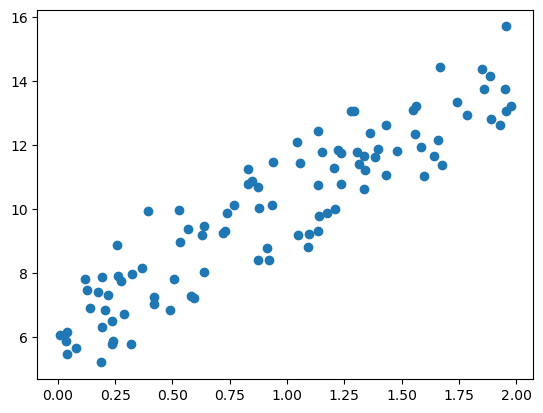

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)
# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [2]:
def get_cost(y, y_pred): 
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

In [3]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [5]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


- p.318, 따라서, 대용량 데이터의 경우, 대부분 미니 배치 확률적 경사하강법을 이용

In [6]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [7]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


## 보스턴 데이터셋

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
# from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거
%matplotlib inline

# boston 데이타셋 로드
# boston = load_boston()

# boston 데이타셋 DataFrame 변환 
# bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)
bostonDF = pd.read_csv('data/boston.csv')


# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
# bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
# MEDV ==> PRICE로 변경
bostonDF = bostonDF.rename(columns = {"MEDV": "PRICE"})
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## 평가지표
- RMSE는 우리가 직접 함수를 만들어야 함
- 오후 실습 때, 회귀분석을 가지고 pipeline, Random Search 진행할 때, 실펴볼 코드가 있으니 확인 요망

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3


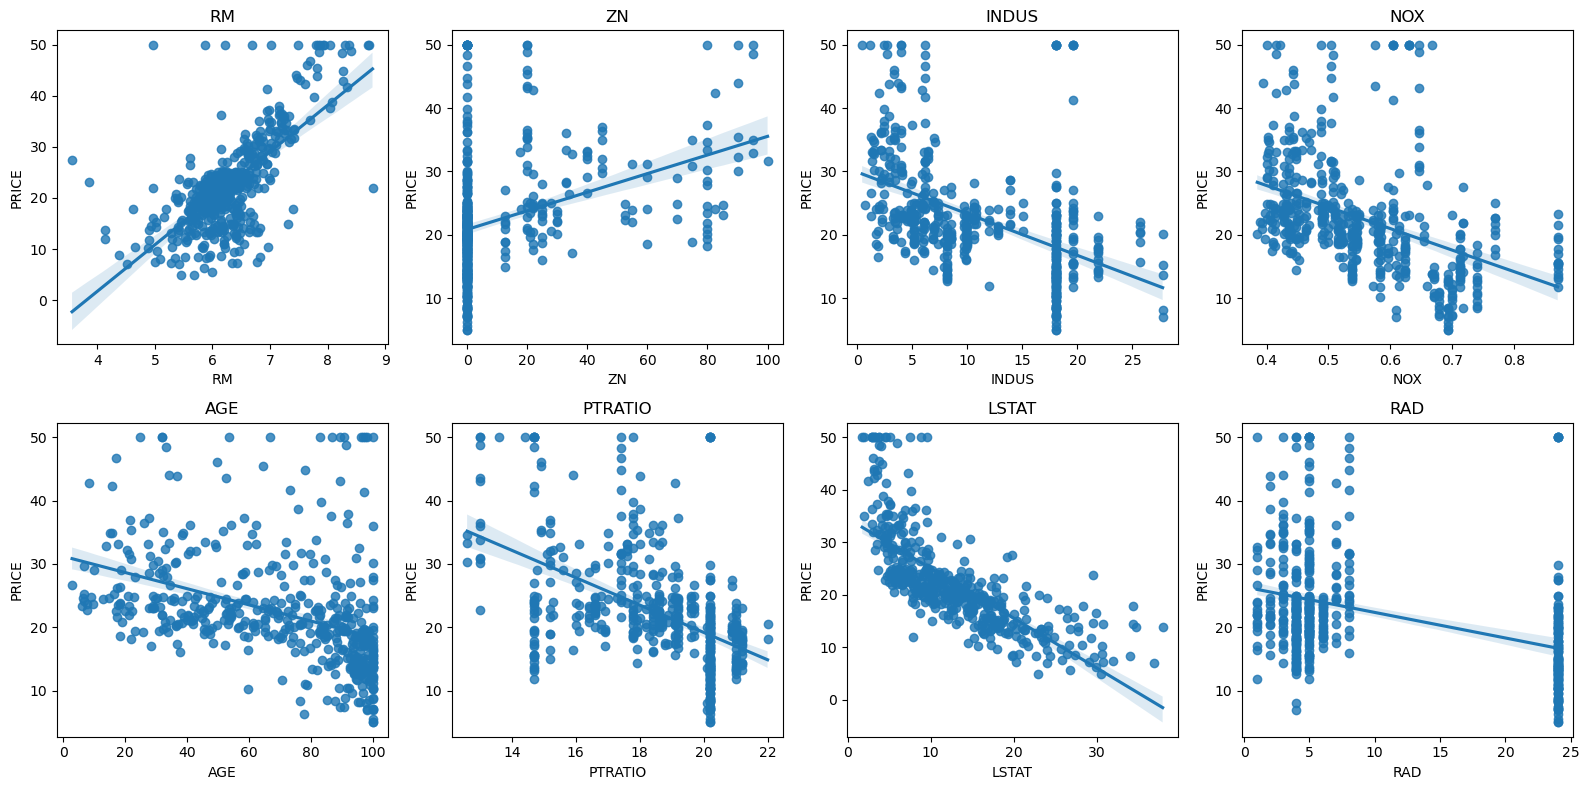

In [15]:
fig, axs= plt.subplots(figsize=(16, 8), ncols = 4, nrows = 2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    print(row, col)
    sns.regplot(x = feature, y = 'PRICE', data = bostonDF, ax = axs[row][col])
    axs[row][col].set_title(feature)
plt.tight_layout()
plt.show()

## Pipeline으로 코드 변경

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)



In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
import numpy as np

bostonDF = pd.read_csv("data/boston.csv")
# print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF = bostonDF.rename(columns = {"MEDV": "PRICE"})

missing_cols = ["CRIM", "ZN", "INDUS", "CHAS", "AGE", "LSTAT"]

for col in missing_cols:
    bostonDF[col] = bostonDF[col].fillna(bostonDF[col].mean())

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# RandomizedSearchCV() 에 대입
param_grid = {'verbose' : [0, 1, -1]}

# ColumnTransformer
column_transformer = ColumnTransformer([
    ("scaler", RobustScaler(), X_data.columns), # scaler
   #  ("ohc_encoder", OneHotEncoder(), ['Warehouse_block', 'Mode_of_Shipment', 'Gender']), # 명목척도 처리
   # ("pd_imp_encoder", OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['Product_importance']), # 서열척도 처리
], remainder = 'passthrough')

pipeline = Pipeline([
    ('preprocessor', column_transformer), 
    ('classifier', LinearRegression())
])

# Grid Search 코드 스타일은 비슷(99% 비슷)
random_search = RandomizedSearchCV(
    estimator = pipeline, 
    param_distributions = param_grid, 
    n_iter = 3, 
    scoring = 'neg_mean_absolute_error', # 잘 모르겠다. 시험장에서는 디폴트 값으로 accuracy
    cv = 3, 
    verbose=3, 
    n_jobs = -1 # CPU cores 모두 사용하겠다는 뜻
)

# 모형학습
# pipeline.fit(X_train, y_train)
random_search.fit(X_train, y_train) 

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaler',
                                                                               RobustScaler(),
                                                                               Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object'))])),
                                             ('classifier',
                                              LinearRegression())]),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'verbose': [0, 1, -1]},
                   scoring='neg_mean_absolute_error', verbose=3)